# DD2421 Lab 2

**Authors:** Navid Farhadi (nfarhadi@kth.se), Arturs Kurzemnieks (artursk@kth.se)

**Course Instance:** DD2421 Machine Learning VT19

In [1]:
import numpy, random, math
from scipy.optimize import minimize 
import matplotlib.pyplot as plt

# Global Variables
classA = None
classB = None
inputs = None
targets = None
N = None
kernel_type = None
p = None
sigma = None
support_vectors = None
threshold = None
P = None
support_vector = None
C = None

In [2]:
def run(kernel_type_input = 'linear', p_input = 1, sigma_input = 1, C_input=1):
    global N
    global alpha
    global targets
    global inputs
    global kernel_type
    global p
    global sigma
    global threshold
    global P
    global classA
    global classB
    global support_vectors
    global b
    global support_vector
    global C
    
    threshold = math.pow(10, -5)
    
    classA = numpy.concatenate((numpy.random.randn(10, 2) * 0.2 + [1.5, 0.5], 
                            numpy.random.randn(10, 2) * 0.2 + [-1.5, 0.5])) 
    classB = numpy.random.randn(20, 2) * 0.2 + [0.0, -0.5]

    inputs = numpy.concatenate((classA, classB)) 
    targets = numpy.concatenate((numpy.ones(classA.shape[0]), -numpy.ones(classB.shape[0])))
    N = inputs.shape[0] 
    permute = list(range(N)) 
    random.shuffle(permute) 
    inputs = inputs[permute, :]
    targets = targets[permute]

    kernel_type = kernel_type_input
    p = p_input
    sigma = sigma_input
    support_vectors = []
    b = 0
    C = C_input
    
    P = numpy.zeros([N,N])
    
    XC={'type':'eq', 'fun':zerofun}
    start = numpy.zeros(N)

    ret = minimize(objective, start, bounds=[(0, C) for b in range(N)], constraints=XC)
    alpha = ret['x']

    extract_nonzero_alpha()
    support_vector = support_vectors[0]
    
    b = 0 - support_vector[2]
    for i in range(N):
        b += alpha[i] * targets[i] * kernel(support_vector[1],inputs[i])
    
    plot()

def kernel(x1,x2):
    if(kernel_type == "linear"):
        return numpy.dot(numpy.transpose(x1),x2)
    if(kernel_type == "polynomial"):
        return (numpy.dot(numpy.transpose(x1),x2) + 1)**p
    if(kernel_type == "RBF"):
        return math.exp(-(numpy.linalg.norm(x1-x2)**2) / (2*(sigma**2)))

def compute_P():
    for i in range(N):
        for j in range(N):
            P[i][j] = targets[i] * targets[j] * kernel(inputs[i],inputs[j])

def objective(alpha):
    compute_P()
    
    sum = 0
    for i in range(N):
        for j in range(N): 
            sum = sum + alpha[i] * alpha[j] * P[i][j]
    
    return 0.5 * sum - numpy.sum(alpha)

def zerofun(alpha):
    sum = 0
    for i in range(N):
        sum = sum + alpha[i] * targets[i]
    
    return sum

def extract_nonzero_alpha():
    if(C == None):
        for i in range(N):
            if(alpha[i] > threshold):
                support_vectors.append([alpha[i], inputs[i], targets[i]])
    else:
        for i in range(N):
            if(alpha[i] > threshold and alpha[i] < C - threshold):
                support_vectors.append([alpha[i], inputs[i], targets[i]])

def indicator(x,y):
    sum = 0
    for i in range(N):
        sum += alpha[i] * targets[i] * kernel([x,y],inputs[i])

    return sum-b
    
def plot():
    
    xgrid = numpy.linspace(-3, 3)
    ygrid = numpy.linspace(-2, 2)
    
    grid = numpy.array([[indicator(x, y) for x in xgrid] for y in ygrid])
    
    plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1,3,1))
    
    #plot data
    plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
    plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
    plt.show()



### Test

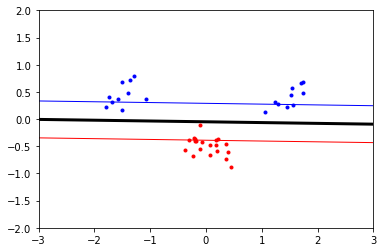

In [3]:
run()